In [2]:
import numpy as np
import h5py

/home/qiu/anaconda3/envs/pyNNQiu/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [6]:
fileD="/work/qiu/data4mt/data/2rdSubmissionData/trai/LCZ42_20985_Paris_spring_1.h5"

#load all the data in this file
hf = h5py.File(fileD, 'r')

x_thisFile=np.array(hf.get('x'))

y_thisFile_=np.array(hf.get('y_1'))

y_thisFile =np.array(hf.get('y_0'))

hf.close()

In [82]:
from skimage import exposure
import matplotlib.pyplot as plt

def linearStretch(input, percent):
    pLow, pHigh = np.percentile(input[~np.isnan(input)], (percent, 100 - percent))
    img_rescale = exposure.rescale_intensity(input, in_range=(pLow, pHigh))
    return img_rescale

def show_patch(image_rgb, one_channel=True):
    """Show image"""
    if one_channel:
        image_rgb = image_rgb.mean(axis=-1)
        plt.imshow(image_rgb, cmap="Greys")
        plt.show()
        return
    
    if image_rgb.shape[2] == 3:
        img_rescaled = linearStretch(image_rgb, 1.25)

    plt.imshow(img_rescaled)
    plt.show()
    plt.pause(0.001)  # pause a bit so that plots are updated
    

In [89]:
paletteLCZ = np.array([140,  0,  0, 
             133,  6,  10,
                199, 14, 21,
                183, 78, 18,
                244, 104, 29,
                247, 154, 90,
                255, 255, 0,
                192, 192, 192,
                255, 204, 153,
                77, 77, 77,
                0, 102, 0,
                21, 255, 21,
                102, 153, 0,
                185, 220, 126,
                0, 102, 255,
                255, 255, 204,
                110, 107, 254])
paletteLCZ = paletteLCZ.reshape(17,3)
print(paletteLCZ)

def patch_2_lczColor(lcz):
    
    img_rgb=np.zeros((lcz.shape[0],lcz.shape[1],3), dtype=np.uint8)
    
    for i in np.arange(lcz.shape[0]):
        for j in np.arange(lcz.shape[1]):
            img_rgb[i,j,0]=paletteLCZ[lcz[i,j],0]
            img_rgb[i,j,1]=paletteLCZ[lcz[i,j],1]
            img_rgb[i,j,2]=paletteLCZ[lcz[i,j],2]
            
    return img_rgb

[[140   0   0]
 [133   6  10]
 [199  14  21]
 [183  78  18]
 [244 104  29]
 [247 154  90]
 [255 255   0]
 [192 192 192]
 [255 204 153]
 [ 77  77  77]
 [  0 102   0]
 [ 21 255  21]
 [102 153   0]
 [185 220 126]
 [  0 102 255]
 [255 255 204]
 [110 107 254]]


In [93]:
print(x_thisFile.shape, y_thisFile.shape, y_thisFile_.shape)
print(np.unique(y_thisFile_))

lcz = y_thisFile_.argmax(axis=-1)+1
print(lcz.shape, np.unique(lcz))

checkIdx = np.random.randint(0, high=x_thisFile.shape[0], size=(3))
print(checkIdx)

(87, 128, 128, 10) (87, 64, 64, 1) (87, 128, 128, 17)
[0 1]
(87, 128, 128) [ 2  3  4  5  6  8  9 11 12 14 15 17]
[50 24 83]


(128, 128, 10)


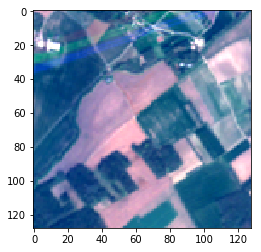

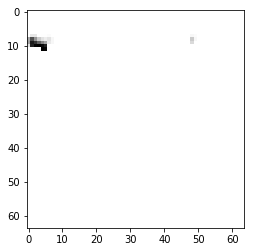

(128, 128)


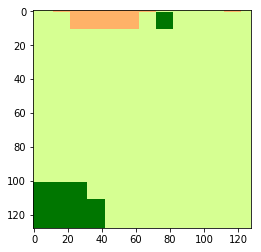

(128, 128, 10)


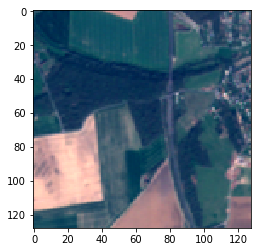

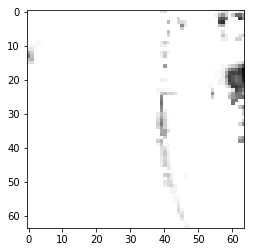

(128, 128)


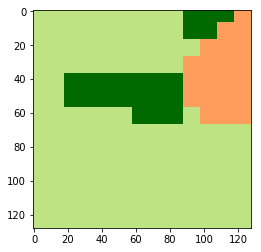

(128, 128, 10)


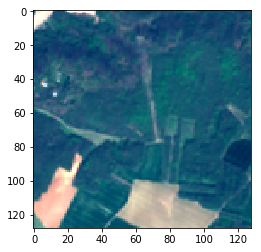

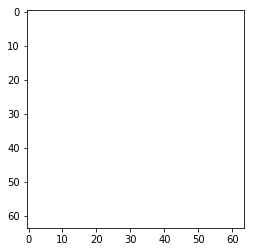

(128, 128)


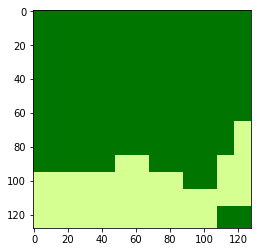

In [94]:
from PIL import Image

#plt.subplot(3, checkIdx.shape[1])

for i in checkIdx:
    x=x_thisFile[i,:,:,:]
    print(x.shape)
    show_patch(x[:,:,[2,1,0]], one_channel=False)
    show_patch(y_thisFile[i,:,:,:])
    
    lcz= y_thisFile_[i,:,:,:]
    
    lcz = lcz.argmax(axis=-1)
    #show_patch(lcz)
    print(lcz.shape)
    #print(lcz)
    
    lcz = patch_2_lczColor(lcz)
    #print(lcz)
    show_patch(lcz, one_channel=False)
    
    